# American Sign Language (ASL) Gesture Recognition using CNN


In [1]:
import os
import cv2
import matplotlib.pyplot as plt


In [2]:
DATASET_PATH = "data/ASL"
classes = os.listdir(DATASET_PATH)
classes


['A', 'B', 'C', 'D', 'E']

In [3]:
import numpy as np
from tqdm import tqdm
IMG_SIZE = 128


## Dataset Loading and Preprocessing


In [4]:
def load_images_from_folder(base_path, classes, img_size=128):
    images = []
    labels = []

    for label, class_name in enumerate(classes):
        class_path = os.path.join(base_path, class_name)
        files = os.listdir(class_path)

        for img_name in files:
            img_path = os.path.join(class_path, img_name)

            img = cv2.imread(img_path)
            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (img_size, img_size))
            img = img / 255.0

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)


In [5]:
test_class = classes[0]   # 'A'
test_path = os.path.join(DATASET_PATH, test_class)

files = os.listdir(test_path)
print("Number of files in class A:", len(files))
print("First 5 files:", files[:5])


Number of files in class A: 3000
First 5 files: ['A1.jpg', 'A10.jpg', 'A100.jpg', 'A1000.jpg', 'A1001.jpg']


In [6]:
sample_img_path = os.path.join(DATASET_PATH, classes[0], files[0])

img = cv2.imread(sample_img_path)

print("Image is None?", img is None)
print("Image shape:", None if img is None else img.shape)


Image is None? False
Image shape: (200, 200, 3)


In [7]:
X_asl, y_asl = load_images_from_folder(DATASET_PATH, classes, IMG_SIZE)
print("ASL Images shapes:", X_asl.shape)
print("ASL Images shapes:",y_asl.shape) 


ASL Images shapes: (15000, 128, 128, 3)
ASL Images shapes: (15000,)


In [8]:
from sklearn.model_selection import train_test_split

## Train-Test Split


In [9]:
X_train_asl, X_test_asl, y_train_asl, y_test_asl = train_test_split(
    X_asl,
    y_asl,
    test_size=0.2,
    random_state = 42,
    stratify = y_asl
)

In [10]:
print("Training images:", X_train_asl.shape)
print("Testing images:", X_test_asl.shape)
print("Training labels:",y_train_asl.shape)
print("Testing labels:",y_test_asl.shape)

Training images: (12000, 128, 128, 3)
Testing images: (3000, 128, 128, 3)
Training labels: (12000,)
Testing labels: (3000,)


In [11]:
import numpy as np
print("Train label distribution:", np.bincount(y_train_asl))
print("Test label distribution:", np.bincount(y_test_asl))


Train label distribution: [2400 2400 2400 2400 2400]
Test label distribution: [600 600 600 600 600]


## CNN Model Architecture


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout

model_asl = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
        Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(5, activation = 'softmax')
])

C:\Users\lhydr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Compilation


In [13]:
model_asl.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)

In [14]:
model_asl.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training


In [15]:
history_asl = model_asl.fit(
    X_train_asl,
    y_train_asl,
    epochs = 10,
    batch_size = 32,
    validation_data = (X_test_asl, y_test_asl)
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 76s 198ms/step - accuracy: 0.5554 - loss: 1.0548 - val_accuracy: 0.9373 - val_loss: 0.1745
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 71s 189ms/step - accuracy: 0.9385 - loss: 0.1753 - val_accuracy: 0.9910 - val_loss: 0.0370
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 73s 193ms/step - accuracy: 0.9764 - loss: 0.0711 - val_accuracy: 0.9910 - val_loss: 0.0271
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 73s 194ms/step - accuracy: 0.9811 - loss: 0.0559 - val_accuracy: 0.9930 - val_loss: 0.0252
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 71s 190ms/step - accuracy: 0.9871 - loss: 0.0377 - val_accuracy: 0.9990 - val_loss: 0.0068
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 71s 189ms/step - accuracy: 0.9915 - loss: 0.0239 - val_accuracy: 0.9987 - val_loss: 0.0060
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 71s 190ms/step - accuracy: 0.9916 - loss: 0.0265 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 72s 192ms/step - accuracy: 0.9936 - loss: 0

## Model Evaluation


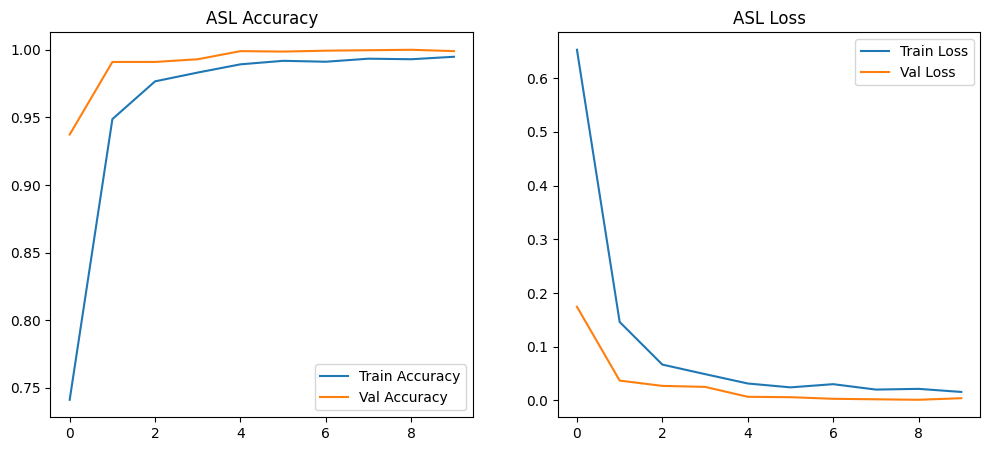

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
#Accuracy
plt.subplot(1,2,1)
plt.plot(history_asl.history['accuracy'], label='Train Accuracy')
plt.plot(history_asl.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('ASL Accuracy')

#Loss
plt.subplot(1,2,2)
plt.plot(history_asl.history['loss'], label='Train Loss')
plt.plot(history_asl.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('ASL Loss')
plt.show()

In [17]:
test_loss, test_acc = model_asl.evaluate(X_test_asl, y_test_asl)
print("Test Accuracy:",test_acc)


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9988 - loss: 0.0039
Test Accuracy: 0.9990000128746033


In [18]:
model_asl.save("asl_model.keras")

In [1]:
import cv2
import numpy as np
import tensorflow as tf

model = tf.keras.models.load_model("asl_model.keras")

classes = ['A', 'B', 'C', 'D', 'E']  # same order as training
IMG_SIZE = 128


## Real-Time ASL Recognition using Webcam


In [11]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Webcam not accessible")
    exit()


In [12]:
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Flip for mirror view
    frame = cv2.flip(frame, 1)

    # Define ROI (Region of Interest)
    x1, y1, x2, y2 = 100, 100, 350, 350
    roi = frame[y1:y2, x1:x2]

    # Draw rectangle
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Preprocess ROI
    roi_resized = cv2.resize(roi, (IMG_SIZE, IMG_SIZE))
    roi_normalized = roi_resized / 255.0
    roi_input = np.expand_dims(roi_normalized, axis=0)

    # Predict
    predictions = model.predict(roi_input, verbose=0)
    class_id = np.argmax(predictions)
    confidence = predictions[0][class_id]

    label = f"{classes[class_id]} ({confidence*100:.2f}%)"

    # Display prediction
    cv2.putText(frame, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow("ASL Real-Time Recognition", frame)

    # EXIT condition (ESC)
    key = cv2.waitKey(1)
    if key == 27:  # ESC key
        break

cap.release()
cv2.destroyAllWindows()
